## **What is Autograd?**
- In PyTorch, every tensor can carry a gradient if requires_grad=True.

- PyTorch builds a dynamic computation graph when you perform operations.

- When you call .backward(), PyTorch automatically applies backpropagation through this graph to compute gradients for each parameter.

##**Backpropagation in PyTorch**

Mathematically, backprop is just chain rule of calculus applied recursively.

In [ ]:
import torch

In [ ]:
X , y = torch.tensor(2.4 , requires_grad=True) , torch.tensor(4.0 , requires_grad=True)

In [ ]:
z = X**2 + y**3

In [ ]:
z

tensor(69.7600, grad_fn=<AddBackward0>)

In [ ]:
z.backward()

In [ ]:
z

tensor(69.7600, grad_fn=<AddBackward0>)

In [ ]:
print(X.grad, y.grad)

tensor(4.8000) tensor(48.)


##**Mini Gradient Descent Example**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as opti

In [ ]:
w = torch.tensor(0.0 , requires_grad=True)

In [ ]:
lr = 0.1

In [ ]:
for i in range(20):
  loss = (w - 5) ** 2

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad

  w.grad.zero_()

  print(f'step: {i+1} : weights = {w.item():.4f} , Loss: {loss.item():.4f} ')

step: 1 : weights = 1.0000 , Loss: 25.0000 
step: 2 : weights = 1.8000 , Loss: 16.0000 
step: 3 : weights = 2.4400 , Loss: 10.2400 
step: 4 : weights = 2.9520 , Loss: 6.5536 
step: 5 : weights = 3.3616 , Loss: 4.1943 
step: 6 : weights = 3.6893 , Loss: 2.6844 
step: 7 : weights = 3.9514 , Loss: 1.7180 
step: 8 : weights = 4.1611 , Loss: 1.0995 
step: 9 : weights = 4.3289 , Loss: 0.7037 
step: 10 : weights = 4.4631 , Loss: 0.4504 
step: 11 : weights = 4.5705 , Loss: 0.2882 
step: 12 : weights = 4.6564 , Loss: 0.1845 
step: 13 : weights = 4.7251 , Loss: 0.1181 
step: 14 : weights = 4.7801 , Loss: 0.0756 
step: 15 : weights = 4.8241 , Loss: 0.0484 
step: 16 : weights = 4.8593 , Loss: 0.0309 
step: 17 : weights = 4.8874 , Loss: 0.0198 
step: 18 : weights = 4.9099 , Loss: 0.0127 
step: 19 : weights = 4.9279 , Loss: 0.0081 
step: 20 : weights = 4.9424 , Loss: 0.0052 


In [ ]:
a = 0.0
lr = 0.1

In [ ]:
epochs = 30

In [ ]:
for epoch in range(30):
  grad = 2 * (a - 8)

  a = a - lr * grad

  loss = (a - 8) ** 2

  print(f"step {i+1}: w={a:.4f}, loss={loss:.4f}, grad={grad:.4f}")



step 20: w=1.6000, loss=40.9600, grad=-16.0000
step 20: w=2.8800, loss=26.2144, grad=-12.8000
step 20: w=3.9040, loss=16.7772, grad=-10.2400
step 20: w=4.7232, loss=10.7374, grad=-8.1920
step 20: w=5.3786, loss=6.8719, grad=-6.5536
step 20: w=5.9028, loss=4.3980, grad=-5.2429
step 20: w=6.3223, loss=2.8147, grad=-4.1943
step 20: w=6.6578, loss=1.8014, grad=-3.3554
step 20: w=6.9263, loss=1.1529, grad=-2.6844
step 20: w=7.1410, loss=0.7379, grad=-2.1475
step 20: w=7.3128, loss=0.4722, grad=-1.7180
step 20: w=7.4502, loss=0.3022, grad=-1.3744
step 20: w=7.5602, loss=0.1934, grad=-1.0995
step 20: w=7.6482, loss=0.1238, grad=-0.8796
step 20: w=7.7185, loss=0.0792, grad=-0.7037
step 20: w=7.7748, loss=0.0507, grad=-0.5629
step 20: w=7.8199, loss=0.0325, grad=-0.4504
step 20: w=7.8559, loss=0.0208, grad=-0.3603
step 20: w=7.8847, loss=0.0133, grad=-0.2882
step 20: w=7.9078, loss=0.0085, grad=-0.2306
step 20: w=7.9262, loss=0.0054, grad=-0.1845
step 20: w=7.9410, loss=0.0035, grad=-0.1476
ste

In [ ]:
w = torch.tensor(0.0 , requires_grad=True)

In [ ]:
lr = 0.1

In [ ]:
k = torch.tensor(0.0 , requires_grad=True)

## **Neural Network 1st Layer**

In [ ]:
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
Y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

In [ ]:
import torch.nn as nn

In [ ]:
model = nn.Linear(1 , 1)

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(
    model.parameters(),
    lr = 0.1)

In [ ]:
epochs = 30

In [ ]:
for epoch in range(30):
  y_pred = model(X)

  loss = loss_fn(y_pred , Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  w = model.weight.item()
  b = model.bias.item()

  print(f"Epoch {epoch+1}: Loss={loss.item():.4f}, Weight={w:.4f}, Bias={b:.4f}")

Epoch 1: Loss=45.7966, Weight=3.4192, Bias=1.7002
Epoch 2: Loss=20.5652, Weight=0.9403, Bias=0.8506
Epoch 3: Loss=9.2365, Weight=2.6046, Bias=1.4103
Epoch 4: Loss=4.1500, Weight=1.4926, Bias=1.0260
Epoch 5: Loss=1.8660, Weight=2.2407, Bias=1.2745
Epoch 6: Loss=0.8404, Weight=1.7424, Bias=1.0992
Epoch 7: Loss=0.3798, Weight=2.0792, Bias=1.2082
Epoch 8: Loss=0.1728, Weight=1.8563, Bias=1.1270
Epoch 9: Loss=0.0798, Weight=2.0084, Bias=1.1734
Epoch 10: Loss=0.0379, Weight=1.9091, Bias=1.1346
Epoch 11: Loss=0.0189, Weight=1.9782, Bias=1.1531
Epoch 12: Loss=0.0103, Weight=1.9344, Bias=1.1334
Epoch 13: Loss=0.0063, Weight=1.9661, Bias=1.1395
Epoch 14: Loss=0.0044, Weight=1.9472, Bias=1.1286
Epoch 15: Loss=0.0035, Weight=1.9621, Bias=1.1293
Epoch 16: Loss=0.0030, Weight=1.9543, Bias=1.1223
Epoch 17: Loss=0.0027, Weight=1.9617, Bias=1.1207
Epoch 18: Loss=0.0025, Weight=1.9588, Bias=1.1157
Epoch 19: Loss=0.0023, Weight=1.9627, Bias=1.1132
Epoch 20: Loss=0.0021, Weight=1.9620, Bias=1.1092
Epoch 2

In [ ]:
import torch
w1 , w2 = torch.tensor(0.0 , requires_grad=True) , torch.tensor(0.0 , requires_grad=True)

In [ ]:
lr = 0.1

In [ ]:
import torch

# start weights (wrong values)
w1 = torch.tensor(0.0, requires_grad=True)
w2 = torch.tensor(0.0, requires_grad=True)

lr = 0.1  # learning rate

for i in range(10):
    # Loss function: how far from targets 3 and -2?
    loss = (w1 - 3)**2 + (w2 + 2)**2

    # Backpropagation: compute gradients
    loss.backward()

    print(f"Step {i+1} BEFORE update:")
    print(f"   w1 = {w1.item():.4f}, grad_w1 = {w1.grad.item():.4f}")
    print(f"   w2 = {w2.item():.4f}, grad_w2 = {w2.grad.item():.4f}")
    print(f"   Loss = {loss.item():.4f}")

    with torch.no_grad():
        # Update both weights using gradients
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad

    # Reset gradients
    w1.grad.zero_()
    w2.grad.zero_()

    print(f"Step {i+1} AFTER update:")
    print(f"   w1 = {w1.item():.4f}, grad_w1 = {w1.grad.item():.4f}")
    print(f"   w2 = {w2.item():.4f}, grad_w2 = {w2.grad.item():.4f}")
    print(f"   Loss = {loss.item():.4f}")



Step 1 BEFORE update:
   w1 = 0.0000, grad_w1 = -6.0000
   w2 = 0.0000, grad_w2 = 4.0000
   Loss = 13.0000
Step 1 AFTER update:
   w1 = 0.6000, grad_w1 = 0.0000
   w2 = -0.4000, grad_w2 = 0.0000
   Loss = 13.0000
Step 2 BEFORE update:
   w1 = 0.6000, grad_w1 = -4.8000
   w2 = -0.4000, grad_w2 = 3.2000
   Loss = 8.3200
Step 2 AFTER update:
   w1 = 1.0800, grad_w1 = 0.0000
   w2 = -0.7200, grad_w2 = 0.0000
   Loss = 8.3200
Step 3 BEFORE update:
   w1 = 1.0800, grad_w1 = -3.8400
   w2 = -0.7200, grad_w2 = 2.5600
   Loss = 5.3248
Step 3 AFTER update:
   w1 = 1.4640, grad_w1 = 0.0000
   w2 = -0.9760, grad_w2 = 0.0000
   Loss = 5.3248
Step 4 BEFORE update:
   w1 = 1.4640, grad_w1 = -3.0720
   w2 = -0.9760, grad_w2 = 2.0480
   Loss = 3.4079
Step 4 AFTER update:
   w1 = 1.7712, grad_w1 = 0.0000
   w2 = -1.1808, grad_w2 = 0.0000
   Loss = 3.4079
Step 5 BEFORE update:
   w1 = 1.7712, grad_w1 = -2.4576
   w2 = -1.1808, grad_w2 = 1.6384
   Loss = 2.1810
Step 5 AFTER update:
   w1 = 2.0170, grad_w1

In [ ]:
# Training data (x, y)
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([3.0, 5.0, 7.0, 9.0])  # true relation: y = 2x + 1

In [ ]:
# Parameters (weights and bias) we want to learn
w = torch.tensor(0.0, requires_grad=True)  # slope
b = torch.tensor(0.0, requires_grad=True)  # intercept

In [ ]:
lr = 0.1

In [ ]:
# Training data (x, y)
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([3.0, 5.0, 7.0, 9.0])  # true relation: y = 2x + 1

for epoch in range(20):
  y_pred = w * x + b

  loss = ((y_pred - y) ** 2).mean()

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

  w.grad.zero_()
  b.grad.zero_()

  print(f"Step {epoch+1}: w = {w.item():.4f}, b = {b.item():.4f}, Loss = {loss.item():.4f}")

Step 1: w = 2.0520, b = 0.8488, Loss = 0.0041
Step 2: w = 2.0496, b = 0.8530, Loss = 0.0038
Step 3: w = 2.0487, b = 0.8576, Loss = 0.0036
Step 4: w = 2.0469, b = 0.8618, Loss = 0.0034
Step 5: w = 2.0457, b = 0.8660, Loss = 0.0032
Step 6: w = 2.0442, b = 0.8699, Loss = 0.0030
Step 7: w = 2.0429, b = 0.8739, Loss = 0.0028
Step 8: w = 2.0416, b = 0.8776, Loss = 0.0027
Step 9: w = 2.0404, b = 0.8813, Loss = 0.0025
Step 10: w = 2.0392, b = 0.8848, Loss = 0.0024
Step 11: w = 2.0380, b = 0.8883, Loss = 0.0022
Step 12: w = 2.0368, b = 0.8916, Loss = 0.0021
Step 13: w = 2.0358, b = 0.8949, Loss = 0.0020
Step 14: w = 2.0347, b = 0.8980, Loss = 0.0018
Step 15: w = 2.0336, b = 0.9011, Loss = 0.0017
Step 16: w = 2.0326, b = 0.9041, Loss = 0.0016
Step 17: w = 2.0317, b = 0.9069, Loss = 0.0015
Step 18: w = 2.0307, b = 0.9097, Loss = 0.0014
Step 19: w = 2.0298, b = 0.9124, Loss = 0.0014
Step 20: w = 2.0289, b = 0.9150, Loss = 0.0013


In [ ]:
w_list = []

In [ ]:
import torch

In [ ]:
a = torch.tensor(0.0 ,
                 requires_grad=True)

b = torch.tensor(0.0,
                 requires_grad=True)

In [ ]:
lr = 0.1

In [ ]:
epochs = 50

In [ ]:
for epoch in range(epochs):

  loss_a = 2**(a - 10)
  loss_b = 2**(b - 4)

  loss = loss_a + loss_b

  loss.backward()

  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad

  a.grad.zero_()
  a.grad.zero_()

  print(f'Epoch : {epoch+1} , Loss : {loss.item():.4f} , a = {a.item():.4f}')
  losses.append(loss.item())

Epoch : 1 , Loss : 0.0635 , a = -0.0001
Epoch : 2 , Loss : 0.0633 , a = -0.0001
Epoch : 3 , Loss : 0.0629 , a = -0.0002
Epoch : 4 , Loss : 0.0624 , a = -0.0003
Epoch : 5 , Loss : 0.0616 , a = -0.0003
Epoch : 6 , Loss : 0.0607 , a = -0.0004
Epoch : 7 , Loss : 0.0597 , a = -0.0005
Epoch : 8 , Loss : 0.0585 , a = -0.0005
Epoch : 9 , Loss : 0.0572 , a = -0.0006
Epoch : 10 , Loss : 0.0557 , a = -0.0007
Epoch : 11 , Loss : 0.0542 , a = -0.0007
Epoch : 12 , Loss : 0.0526 , a = -0.0008
Epoch : 13 , Loss : 0.0508 , a = -0.0009
Epoch : 14 , Loss : 0.0491 , a = -0.0009
Epoch : 15 , Loss : 0.0473 , a = -0.0010
Epoch : 16 , Loss : 0.0454 , a = -0.0011
Epoch : 17 , Loss : 0.0436 , a = -0.0012
Epoch : 18 , Loss : 0.0417 , a = -0.0012
Epoch : 19 , Loss : 0.0398 , a = -0.0013
Epoch : 20 , Loss : 0.0380 , a = -0.0014
Epoch : 21 , Loss : 0.0362 , a = -0.0014
Epoch : 22 , Loss : 0.0344 , a = -0.0015
Epoch : 23 , Loss : 0.0326 , a = -0.0016
Epoch : 24 , Loss : 0.0309 , a = -0.0016
Epoch : 25 , Loss : 0.029

In [ ]:
losses : list = []

In [ ]:
losses

[0.0634765625,
 0.06328912824392319,
 0.06291653215885162,
 0.06236321106553078,
 0.06163565069437027,
 0.06074228510260582,
 0.05969323217868805,
 0.05850008502602577,
 0.0571756437420845,
 0.05573364347219467,
 0.05418846383690834,
 0.05255483463406563,
 0.050847623497247696,
 0.04908152297139168,
 0.04727083444595337,
 0.04542930796742439,
 0.043569955974817276,
 0.041704945266246796,
 0.03984545171260834,
 0.038001641631126404,
 0.03618258982896805,
 0.03439633175730705,
 0.032649800181388855,
 0.030948879197239876,
 0.029298486188054085,
 0.027702560648322105,
 0.02616419829428196,
 0.024685652926564217,
 0.023268485441803932,
 0.021913575008511543,
 0.02062123641371727,
 0.019391262903809547,
 0.018223024904727936,
 0.017115499824285507,
 0.01606738194823265,
 0.015077092684805393,
 0.014142850413918495,
 0.013262714259326458,
 0.012434633448719978,
 0.011656466871500015,
 0.010926028713583946,
 0.010241101495921612,
 0.009599468670785427,
 0.008998934179544449,
 0.00843732897192

<Axes: ylabel='Count'>

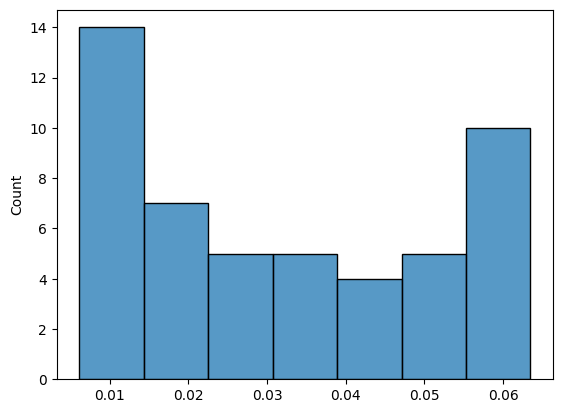

In [ ]:
import seaborn as sns

sns.histplot(losses)

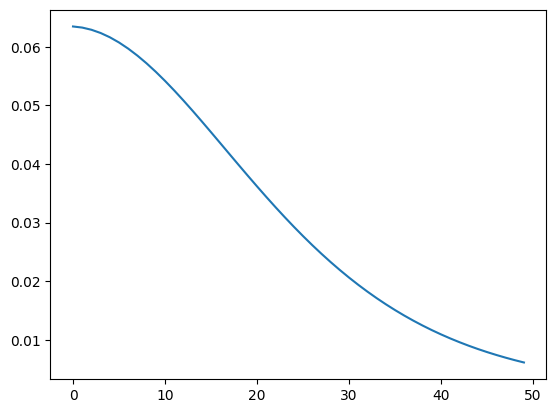

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses , label='Losses of gradient')

In [ ]:
import torch
import torch.nn as nn

# Training data
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

In [ ]:
class linear_model (nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1 , 1)

  def forward(self , x):
    return self.linear(x)


In [ ]:
model = linear_model()

In [ ]:
optimizer = torch.optim.SGD(model.parameters() , lr = 0.1)

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
epochs : int = 40